In [1]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("joseph10/berttiny-hate_speech18-bothpretrained")
model = AutoModelForSequenceClassification.from_pretrained("joseph10/berttiny-hate_speech18-bothpretrained")

In [2]:
print(model.config)

BertConfig {
  "_name_or_path": "joseph10/berttiny-hate_speech18-nonpretrained",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 128,
  "id2label": {
    "0": "noHate",
    "1": "hate",
    "2": "idk/skip",
    "3": "relation"
  },
  "initializer_range": 0.02,
  "intermediate_size": 512,
  "label2id": {
    "hate": "1",
    "idk/skip": "2",
    "noHate": "0",
    "relation": "3"
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 2,
  "num_hidden_layers": 2,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.36.0.dev0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



In [6]:
# import numpy as np
# # Print the model's architecture
# print(model)

# # Optionally, print the number of parameters
# model_parameters = filter(lambda p: p.requires_grad, model.parameters())
# params = sum([np.prod(p.size()) for p in model_parameters])
# print(f"Number of trainable parameters: {params}")

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-1): 2 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=128, out_features=128, bias=True)
              (key): Linear(in_features=128, out_features=128, bias=True)
              (value): Linear(in_features=128, out_features=128, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=128, out_features=128, bias=True)
              (LayerNorm): LayerNorm((128,), eps=1e-12, e

In [18]:
# import torch
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# # Load the model and tokenizer
# model = AutoModelForSequenceClassification.from_pretrained("joseph10/berttiny-hate_speech18-nonpretrained")
# tokenizer = AutoTokenizer.from_pretrained("joseph10/berttiny-hate_speech18-nonpretrained")

# # Create a sample text
# sample_text = ["This is a sample input text for the model"]

# # Tokenize the text to create a dummy input
# inputs = tokenizer(sample_text, return_tensors='pt', padding='max_length', max_length=512, truncation=True)

# # Export the model to ONNX
# torch.onnx.export(model, 
#                   args=(inputs['input_ids'], inputs['attention_mask']), 
#                   f="model.onnx", 
#                   input_names=['input_ids', 'attention_mask'], 
#                   output_names=['output'],
#                   dynamic_axes={'input_ids': {0: 'batch_size'}, 'attention_mask': {0: 'batch_size'}, 'output': {0: 'batch_size'}},
#                   do_constant_folding=True,
#                   opset_version=11)

In [19]:
import torch
import matplotlib.pyplot as plt

# Assuming 'model' is your neural network model
for name, param in model.named_parameters():
    if param.requires_grad and "weight" in name:  # To ensure we only visualize weights and not biases
        print(name, param.data)

bert.embeddings.word_embeddings.weight tensor([[-4.1018e-03, -3.0695e-02, -3.5295e-03,  ...,  1.8925e-02,
          3.7396e-03, -2.9233e-03],
        [-4.2748e-04, -3.6929e-02, -1.7168e-02,  ...,  2.9314e-02,
         -1.0398e-02,  2.6772e-02],
        [ 5.9418e-03,  4.2119e-03, -1.9566e-02,  ...,  1.6799e-02,
         -2.7802e-02, -6.9017e-03],
        ...,
        [ 3.5573e-02, -1.5891e-02,  4.9951e-03,  ...,  5.4071e-03,
         -1.1270e-02, -6.9528e-05],
        [-8.7018e-03, -2.2516e-02,  3.1993e-03,  ...,  2.7591e-02,
         -1.9554e-02,  2.4023e-03],
        [-7.8904e-02, -7.5407e-02, -4.6660e-03,  ..., -5.3340e-03,
         -4.4993e-02,  5.9842e-02]])
bert.embeddings.position_embeddings.weight tensor([[ 0.0411, -0.0140, -0.5193,  ...,  0.0685, -0.0007,  0.0006],
        [-0.0393,  0.0121, -0.0358,  ..., -0.0404, -0.0155, -0.0419],
        [-0.0640, -0.0164, -0.0240,  ..., -0.0664,  0.0175, -0.0072],
        ...,
        [-0.0270,  0.0074,  0.0299,  ..., -0.0650,  0.0224, -0.

In [24]:
pip install seaborn

   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.6 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


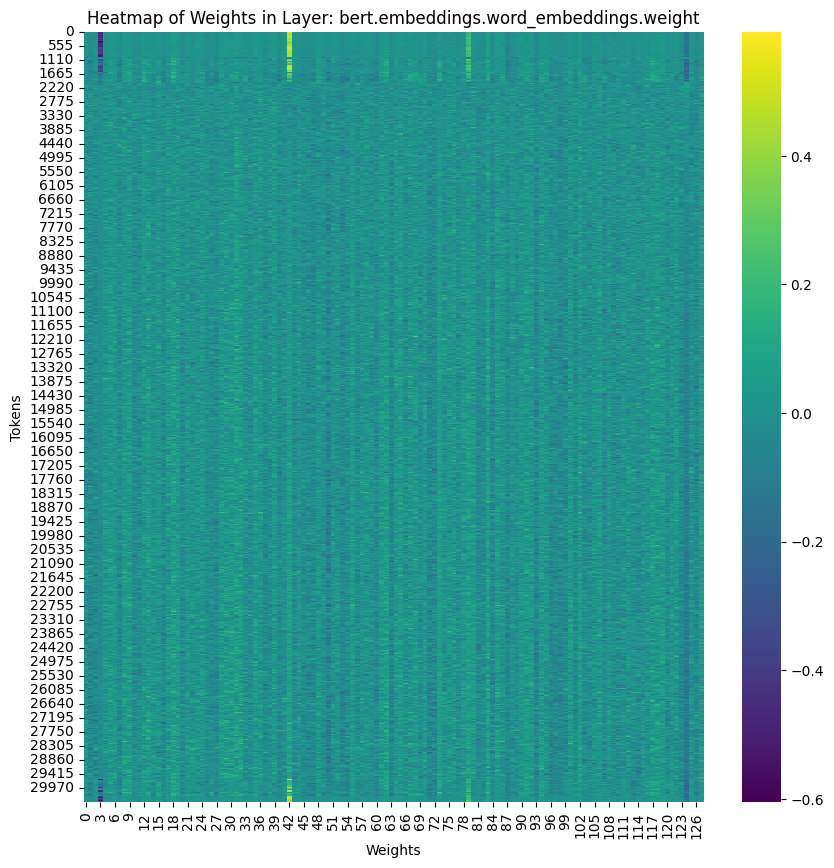

In [25]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model' is your neural network model
for name, param in model.named_parameters():
    if param.requires_grad and "weight" in name:
        # Select a specific layer to visualize
        if name == 'bert.embeddings.word_embeddings.weight':
            weights = param.data.cpu().numpy()

            # Plotting the heatmap
            plt.figure(figsize=(10, 10))
            sns.heatmap(weights, cmap='viridis')
            plt.title(f'Heatmap of Weights in Layer: {name}')
            plt.xlabel('Weights')
            plt.ylabel('Tokens')
            plt.show()
            break  # Remove break if you want to plot more layers

In [22]:
for name, layer in model.named_modules():
    print(name, layer)

 BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-1): 2 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=128, out_features=128, bias=True)
              (key): Linear(in_features=128, out_features=128, bias=True)
              (value): Linear(in_features=128, out_features=128, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=128, out_features=128, bias=True)
              (LayerNorm): LayerNorm((128,), eps=1e-12, 

In [20]:
filters = model.state_dict()['conv_layer_name.weight'].cpu()

# Visualize each filter
n_filters = filters.shape[0]
plt.figure(figsize=(20, 17))
for i in range(n_filters):
    plt.subplot(8, 8, i+1)  # Adjust the grid size depending on the number of filters
    plt.imshow(filters[i, 0, :, :], cmap='gray')  # Adjust indexing if filters have multiple channels
    plt.axis('off')
plt.show()

KeyError: 'layer_name.weight'